<div style="display: flex; justify-content: space-between;">
    <img src="figures/logoAIMLab.png" alt="Left Logo" style="max-width: 150px; margin-right: auto;">
    <img src="figures/TechnionLogo.png" alt="Right Logo" style="max-width: 150px; margin-left: auto;">
</div>

<font color='purple'>*AIMLab. | Artificial Intelligence in Medicine Laboratory*</font>
    
<font color='blue'>*Technion | Israel Institute of Technology*</font>

**In collaboration with Prof. Leo Anthony Celi, MIT Laboratory of Computational Physiology**

Please install the *virtual enviorment* using the yml file before running this notebook.

You will also need to install a [Matlab Runtime](https://www.mathworks.com/products/compiler/matlab-runtime.html) version 9.10:

- For [Windows](https://ssd.mathworks.com/supportfiles/downloads/R2021a/Release/8/deployment_files/installer/complete/win64/MATLAB_Runtime_R2021a_Update_8_win64.zip)

- For [Linux](https://ssd.mathworks.com/supportfiles/downloads/R2021a/Release/8/deployment_files/installer/complete/glnxa64/MATLAB_Runtime_R2021a_Update_8_glnxa64.zip)

For more information, follow the [pecg documentation](https://pecg.readthedocs.io/en/latest/index.html). 

# Feature Engineering with PhysioZoo



*Eran Zvuloni, PhD Candidate @ Technion-IIT*

We are going to explore various categories of engineered features that are derived from physiological time series data. These features can be calculated using the [PhysioZoo](https://physiozoo.com/) software and its associated toolboxes.

## PhysioZoo HRV

**Extracting heart rate variability (HRV) features from the electrocardiogram (ECG).**

HRV is a measure of the variation in time between successive heartbeats. In other words, it quantifies the changes in the time intervals between consecutive heartbeats, which are normally not identical even when the heart rate is constant.

The time duration between successive R peaks in the ECG signal can be quantified as consecutive heartbeats.

<img src="figures/HRV.png" width="800" />

<center>Wikipedia</center>

However, one notable advantage of utilizing HRV features is their modality invariance, thus can be extracted from other type of signals, such as photoplethysmography, images and more.

HRV features are engineered in multiple techniques, including time, frequency, and non-linear domains. The PhysioZoo software can extract **25 HRV features**. Some of these are described in the following work:

<center><img src="figures/HRV_table.png" width="500" /></center>

<center>Chocron A., et al.; IEEE TBME; 2021</center>

## PhysioZoo ECG
The [pecg](https://pecg.readthedocs.io/en/latest/) toolbox can extract **morphological biomarkers** from the ECG data. These biomarkers are complimentary to the HRV features, since they are not based on the temporal intervals between R peaks. Instead, they are derived from the segments and waves identified based on fiducial points that define the characteristic waveform of the ECG signal: P wave, T wave and QRS complex.

Fiducial points in the ECG signal:
<center><img src="figures/MOR.png" width="800" /></center>
<center>Gendelman S., et al.; Computing in Cardiology; 2021</center>

The biomarkers are extracted from the ECG cycle, and then statistics over the cycle (such as mean, std, etc.) are used as the features.

<center><img src="figures/int_table.png" width="800" /></center>
<center>Gendelman S., et al.; Computing in Cardiology; 2021</center>

<center><img src="figures/wave_table.png" width="800" /></center>
<center>Gendelman S., et al.; Computing in Cardiology; 2021</center>

These biomarkers are also extractable using the PhysioZoo software. However, for large databases, it is recommended to use the dedicated Python package which we will elaborate on:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import HiddenPrints, plot_leads

For the demonstration, we will select several 12-lead ECG recording examples from the [PhysioNet PTB-XL dataset](https://physionet.org/content/ptb-xl/1.0.3/). 

We have an implemented parsing function that will help us to access this data. The parser is configured to give a label of **0 in case of normal sinus rhythm (NSR, i.e., the healthy condition), and 1 for atrial fibrillation (AF), an arrhythmia.** Any other abnormal conditions will be assigned a label of -1 (however, we will not be utilizing such recordings in this context).

In [2]:
from parsing import PTBParser

data_parser = PTBParser()

fs = data_parser.fs  # ECG sampling frequnecy, 500 Hz in this case.

print(fs, 'Hz')

500 Hz


Now we will select 100 NSR (healthy) examples and 100 AF (heart condition) examples:

In [3]:
SR_records = []
AF_records = []

for index in range(len(data_parser)):
    label = data_parser.get_label(index)
    if label==0:
        SR_records.append(index)
    elif label==1:
        AF_records.append(index)
    if len(SR_records)>=100 and len(AF_records)>=100:
        break
        
SR_records = SR_records[:100]
AF_records = AF_records[:100]

print('Normal sinus rhythm (NSR) recording indices:\n\n', SR_records, '\n\n')
print('Atrial fibrilation (AF) recording indices:\n\n', AF_records)

Normal sinus rhythm (NSR) recording indices:

 [0, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 15, 18, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 72, 73, 74, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 98, 100, 101, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116] 


Atrial fibrilation (AF) recording indices:

 [16, 144, 274, 299, 310, 313, 322, 329, 343, 420, 444, 469, 487, 534, 544, 554, 556, 568, 581, 585, 595, 597, 621, 623, 624, 643, 661, 678, 684, 686, 690, 704, 709, 718, 746, 748, 807, 812, 815, 816, 833, 846, 853, 859, 895, 910, 926, 929, 950, 999, 1004, 1013, 1026, 1039, 1040, 1052, 1062, 1064, 1098, 1113, 1151, 1165, 1166, 1180, 1190, 1216, 1220, 1262, 1391, 1406, 1417, 1426, 1473, 1487, 1489, 1495, 1511, 1573, 1611, 1614, 1633, 1675, 1742, 1750, 1785, 1786, 1788, 1802, 1804, 1845, 1876, 18

And we will download the selected examples:

In [4]:
all_records = SR_records + AF_records

data_parser.download_recordings(all_records)

Generating record list for: records500/00000/00001_hr
Generating record list for: records500/00000/00003_hr
Generating record list for: records500/00000/00004_hr
Generating record list for: records500/00000/00005_hr
Generating record list for: records500/00000/00006_hr
Generating record list for: records500/00000/00007_hr
Generating record list for: records500/00000/00008_hr
Generating record list for: records500/00000/00009_hr
Generating record list for: records500/00000/00010_hr
Generating record list for: records500/00000/00013_hr
Generating record list for: records500/00000/00014_hr
Generating record list for: records500/00000/00016_hr
Generating record list for: records500/00000/00019_hr
Generating record list for: records500/00000/00021_hr
Generating record list for: records500/00000/00022_hr
Generating record list for: records500/00000/00024_hr
Generating record list for: records500/00000/00025_hr
Generating record list for: records500/00000/00026_hr
Generating record list for: 

Let's load one arbitrary recording as an example:

In [5]:
signal, label = data_parser[all_records[1]]
print(signal.shape)
print(label)

(5000, 12)
0


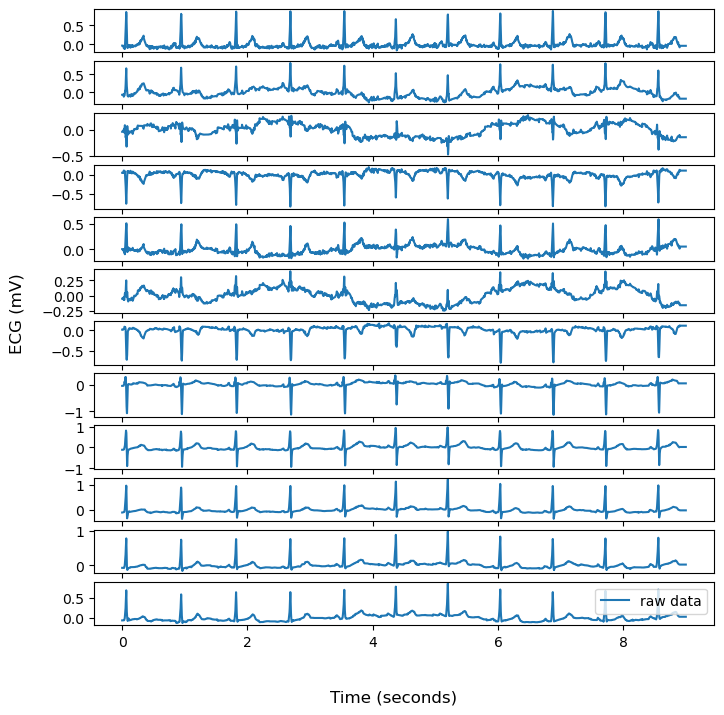

In [6]:
plot_leads([signal], fs, labels=['raw data'],  figsize=(8,8))

We will use this signal now to demonstrate all the different steps for computing the mprphological biomarkers. Each of these steps will be encapsulated within a dedicated function. Later, we will apply these functions to compute the biomarkers for an entire batch of examples.

#### 1. Filter the signal:

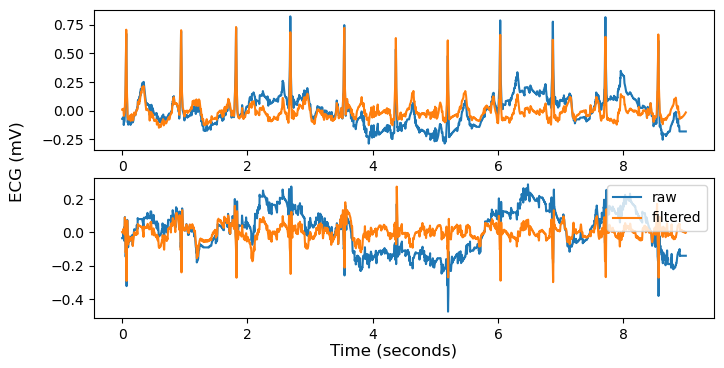

In [7]:
from pecg import Preprocessing as Pre

def filter_ecg(signal, fs):
    pre = Pre.Preprocessing(signal, fs)

    # Notch filter the powerline:
    filtered_signal = pre.notch(n_freq=50)  # 50 Hz for european powerline, 60 Hz for USA

    # Bandpass for baseline wander and high-frequency noise:
    filtered_signal = pre.bpfilt()
    
    return filtered_signal

filtered_signal = filter_ecg(signal, fs)
plot_leads([signal, filtered_signal], fs, leads=[1,2], labels=['raw', 'filtered'])

#### 2. Detect R peaks:

In [8]:
from pecg.ecg import FiducialPoints as Fp

def find_R_peaks(filtered_signal, fs):
    fp = Fp.FiducialPoints(filtered_signal, fs)

    # Two different peak detector algorithms:
    with HiddenPrints(): # to avoid long verbose of the peak detector functions
        jqrs_peaks = fp.jqrs()
        xqrs_peaks = fp.xqrs()
    
    return jqrs_peaks, xqrs_peaks

jqrs_peaks, xqrs_peaks = find_R_peaks(filtered_signal, fs)

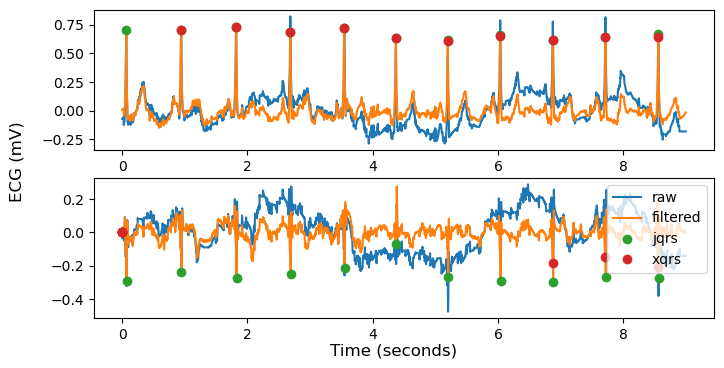

In [9]:
peaks = {'jqrs': jqrs_peaks.astype(int), 'xqrs': xqrs_peaks.astype(int)}

plot_leads([signal, filtered_signal], fs, leads=[1,2], labels=['raw', 'filtered'], peaks=peaks)

#### 3. Compute the bsqi:

bsqi is a metric used to assess signal quality, providing an evaluation score within the range of 0 to 1.

Its computation relies on two independent peak detection algorithms (such as we used in the previous step), while it checks for their agreement.

We will implement a simple function that collect different bsqi scores for multiple leads, by extending the bsqi algorithm given in the PhysioZoo ECG toolbox:

In [10]:
def multiple_lead_bsqi(signal, fs, ref_peaks, test_peaks):
    bsqi_scores=[]
    for i in np.arange(0, signal.shape[1]):  # a loop over the leads.
        refqrs=ref_peaks[:, i]
        testqrs=test_peaks[:, i]
        pre = Pre.Preprocessing(signal[:, i], fs)
        with HiddenPrints():
            bsqi_scores.append(pre.bsqi(refqrs[refqrs>0], testqrs[testqrs>0])) # the peak detector output might be padded, thus we need to avoid zero values.
    return bsqi_scores

bsqi_scores = multiple_lead_bsqi(filtered_signal, fs, jqrs_peaks, xqrs_peaks)

bsqi_scores

[0.9523809523809523,
 0.9523809523809523,
 0.42857142857142855,
 0.9523809523809523,
 0.9523809523809523,
 0,
 0.9523809523809523,
 0.9523809523809523,
 0.9523809523809523,
 0.9523809523809523,
 0.9523809523809523,
 0.9523809523809523]

#### 4. Find fiducials:

The fiducials are computed by the Wavedet algorithm by [Martinez et al.](https://ieeexplore.ieee.org/abstract/document/1275572?casa_token=bIWP-_aJIcMAAAAA:4VQCaPXhfpBRPNLsxZzNSR1iuDnwT-InFCAYnkIbL58_ZT-b6rylZexg3HoRp0-fWtlR3g)

The pecg toolbox uses its MATLAB implementation, thus needs MATLAB Runtime (compiler) installed.

In [11]:
def find_fiducials(filtered_signal, fs, peaks):

    matlab_pat =  r'C://Program Files//MATLAB//MATLAB Runtime//v910//runtime//win64'  # edit to the MATLAB Runtime path installed in your machine
    
    fp = Fp.FiducialPoints(filtered_signal, fs)
    fiducials = fp.wavedet(matlab_pat, peaks=peaks)
    
    return fiducials

fiducials = find_fiducials(filtered_signal, fs, peaks=jqrs_peaks)

In [12]:
df_fiducials = pd.DataFrame(fiducials).T
df_fiducials.head()

,Pon,P,Poff,QRSon,QRSoff,qrs,Ton,T,Toff
0,"[nan, 399.0, 919.0, 1406.0, 1887.0, 2334.0, 27...","[nan, 417.0, 951.0, 1428.0, 1909.0, 2364.0, 27...","[nan, 480.0, 969.0, 1445.0, 1927.0, 2387.0, 28...","[nan, 510.0, 996.0, 1478.0, 1955.0, 2413.0, 28...","[nan, 536.0, 1022.0, 1503.0, 1983.0, 2446.0, 2...","[36, 524, 1011, 1492, 1970, 2427, 2888, 3353, ...","[nan, 633.0, 1086.0, 1590.0, 2057.0, 2525.0, 2...","[nan, 666.0, 1158.0, 1642.0, 2123.0, 2576.0, 3...","[nan, 722.0, 1194.0, 1681.0, 2159.0, 2612.0, 3..."
1,"[nan, 427.0, 918.0, 1401.0, 1845.0, 2300.0, 28...","[nan, 461.0, 945.0, 1428.0, 1872.0, 2341.0, 28...","[nan, 476.0, 965.0, 1444.0, 1922.0, 2375.0, 28...","[nan, 502.0, 993.0, 1468.0, 1947.0, 2409.0, 28...","[nan, 540.0, 1028.0, 1514.0, 1995.0, 2447.0, 2...","[36, 523, 1010, 1491, 1970, 2427, 2888, 3353, ...","[nan, 682.0, 1163.0, 1622.0, 2106.0, 2536.0, 2...","[nan, 734.0, 1188.0, 1642.0, 2124.0, 2579.0, 3...","[nan, 751.0, 1235.0, 1737.0, 2209.0, 2614.0, 3..."
2,"[nan, nan, nan, 1349.0, nan, nan, 2770.0, nan,...","[nan, nan, nan, 1366.0, nan, nan, 2810.0, nan,...","[nan, nan, nan, 1388.0, nan, nan, 2835.0, nan,...","[nan, 472.0, 1001.0, 1475.0, 1959.0, 2409.0, 2...","[nan, 542.0, 1027.0, 1508.0, 1996.0, 2487.0, 2...","[39, 526, 1014, 1494, 1972, 2430, 2891, 3356, ...","[nan, 629.0, 1110.0, 1550.0, 2022.0, 2531.0, 3...","[nan, 668.0, 1157.0, 1573.0, 2072.0, 2562.0, 3...","[nan, 695.0, 1192.0, 1668.0, 2087.0, 2605.0, 3..."
3,"[nan, 427.0, 918.0, 1404.0, nan, 2305.0, 2801....","[nan, 462.0, 948.0, 1428.0, nan, 2350.0, 2825....","[nan, 481.0, 967.0, 1446.0, nan, 2376.0, 2847....","[nan, 509.0, 993.0, 1476.0, 1916.0, 2411.0, 28...","[nan, 536.0, 1023.0, 1505.0, 1983.0, 2440.0, 2...","[36, 523, 1011, 1492, 1970, 2427, 2888, 3353, ...","[nan, 640.0, 1109.0, 1592.0, 2103.0, 2530.0, 2...","[nan, 664.0, 1158.0, 1642.0, 2123.0, 2577.0, 3...","[nan, 724.0, 1193.0, 1738.0, 2210.0, 2613.0, 3..."
4,"[nan, 438.0, 923.0, nan, nan, 2335.0, 2775.0, ...","[nan, 462.0, 954.0, nan, nan, 2368.0, 2799.0, ...","[nan, 480.0, 969.0, nan, nan, 2384.0, 2850.0, ...","[nan, 511.0, 993.0, 1475.0, 1956.0, 2408.0, 28...","[nan, 541.0, 1027.0, 1509.0, 1988.0, 2446.0, 2...","[37, 525, 1012, 1492, 1971, 2427, 2889, 3354, ...","[nan, 617.0, 1100.0, 1579.0, 2080.0, 2523.0, 2...","[nan, 667.0, 1158.0, 1642.0, 2122.0, 2574.0, 3...","[nan, 714.0, 1194.0, 1676.0, 2154.0, 2611.0, 3..."


So each fiducial point type was found multiple times in each lead across the 10-second ECG cycle.

#### 5. Compute the biomarkers:

In [13]:
from pecg.ecg import Biomarkers as Bm

def compute_biomarkers(filtered_signal, fs, fiducials):

    bm = Bm.Biomarkers(filtered_signal, fs, fiducials)
    ints, stat_i = bm.intervals()
    waves, stat_w = bm.waves()
    
    return ints, stat_i, waves, stat_w

ints, stat_i, waves, stat_w = compute_biomarkers(filtered_signal, fs, fiducials)

Both intervals and waves biomarkers were computed several times across the ECG cycle, with respect to the fiducial points found in the previous step. Then, statistics of each biomarker across the whole 10-second cycle are extracted and can be used as feature.

In [14]:
df_ints = pd.DataFrame(ints).T
print('TP_seg biomarkers in lead 0:', df_ints.loc[0]['TP_seg'])

TP_seg biomarkers in lead 0: [394. 424. 412. 350. 330. 392. 386. 386.]


In [15]:
df_stat_i = pd.DataFrame(stat_i).T
print('Statistics extracted for the TP_seg biomarkers in lead 0:', df_stat_i.loc[0]['TP_seg'])

Statistics extracted for the TP_seg biomarkers in lead 0: {'mean': 384.25, 'median': 389.0, 'min': 330.0, 'max': 424.0, 'iqr': 21.5, 'std': 28.78259022395309}


In [16]:
df_waves = pd.DataFrame(waves).T
print('Pwave biomarkers in lead 0:', df_waves.loc[0]['Pwave'])

Pwave biomarkers in lead 0: [0.04722737 0.12963255 0.1006426  0.09183337 0.10157871 0.03993324
 0.11651409 0.1001399  0.11034211]


In [17]:
df_stat_w = pd.DataFrame(stat_w).T
print('Statistics extracted for the Pwave biomarkers in lead 0:', df_stat_w.loc[0]['Pwave'])

Statistics extracted for the Pwave biomarkers in lead 0: {'mean': 0.0930937720843687, 'median': 0.1006426029265417, 'min': 0.03993324360850322, 'max': 0.1296325524778002, 'iqr': 0.018508734508523556, 'std': 0.028462612219985667}


Let's create a technical function that facilitates the extraction of a chosen statistical measure (e.g., median). 

This function will be designed to operate on concatenated data from multiple leads. It will enable the extraction of computed biomarkers from each set of 12 leads and aggregate them for a single recording.

In [18]:
def selected_stat_to_df(stat_dict, selected_stat_name, leads_in_recording=12):
    
    # Initialize all recordings dictionaries:
    stat_dict_selected = {int(np.floor(lead_key/leads_in_recording)): {} for lead_key in stat_dict.keys()}
    
    # Iterating over each biomarker from each lead:
    for lead_key, lead_value in stat_dict.items():
        recording_index = int(np.floor(lead_key/leads_in_recording))
        for key, value in lead_value.items():
            stat_dict_selected[recording_index][f'{key}_{lead_key%leads_in_recording}'] = value[selected_stat_name] 
    df_selected_stat = pd.DataFrame(stat_dict_selected).T

    return df_selected_stat

In [19]:
df_stat_i_median = selected_stat_to_df(stat_i, 'median')
df_stat_w_median = selected_stat_to_df(stat_w, 'median')

single_recording_features = pd.concat((df_stat_i_median, df_stat_w_median), axis=1)

single_recording_features

,PR_int2_0,PR_int2_1,PR_int2_10,PR_int2_11,PR_int2_2,PR_int2_3,PR_int2_4,PR_int2_5,PR_int2_6,PR_int2_7,...,Twave_10,Twave_11,Twave_2,Twave_3,Twave_4,Twave_5,Twave_6,Twave_7,Twave_8,Twave_9
0,126.0,137.0,134.0,133.0,183.0,132.0,124.0,178.0,158.0,146.0,...,0.104913,0.11401,0.078409,0.182297,0.160962,0.045607,0.169913,0.099925,0.221154,0.117669


**Thus, 264 biomarkers were extracted from one 12-lead ECG recording!**

#### Fuse everything into a pipeline and running in batch:

The pipeline is implemented in a way that it can run over a set of leads: 

In [20]:
def compute_recording(signal, fs, selected_stat_name='median', leads_in_recording=12):
    # Compute biomarkers
    print('Filtering...')
    filtered_signal = filter_ecg(signal, fs)
    print('Detecting peaks...')
    jqrs_peaks, xqrs_peaks = find_R_peaks(filtered_signal, fs)
    print('Computing bsqi...')
    bsqi_scores = multiple_lead_bsqi(filtered_signal, fs, jqrs_peaks, xqrs_peaks)
    print('Finding fiducials...')
    fiducials = find_fiducials(filtered_signal, fs, peaks=jqrs_peaks)
    print('Computing biomarkers...')
    ints, stat_i, waves, stat_w = compute_biomarkers(filtered_signal, fs, fiducials)
    
    # Arrange into a dataframe:
    df_stat_i_median = selected_stat_to_df(stat_i, selected_stat_name)
    df_stat_w_median = selected_stat_to_df(stat_w, selected_stat_name)
    recording_features = pd.concat((df_stat_i_median, df_stat_w_median), axis=1)
    
    # Add the mean bsqi as another feature for the entire recording:
    bsqi_scores = np.array(bsqi_scores).reshape(-1 ,leads_in_recording)  # reshape into 12 leads
    recording_features.insert(0, 'mean_bsqi', np.mean(bsqi_scores, axis=1))
    return recording_features

We have established the pipeline to process data across individual leads. Consequently, when dealing with multiple recordings, it becomes necessary to concatenate the data along the leads dimension.

(Here, we also retrieve the label associated with each recording.)

In [21]:
labels = []

for i, index in enumerate(all_records):
    signal, label = data_parser[index]
    
    if i==0:
        signals = np.expand_dims(signal, axis=0)
    else:
        signals = np.concatenate((signals,  np.expand_dims(signal, axis=0)), axis=0)
    labels.append(label)

print('Before concatenation: (recordings, samples, leads): ', signals.shape)

signals = np.swapaxes(signals, 0, 1)
signals = signals.reshape(signals.shape[0], -1)
print('After concatenation: (samples, leads): ', signals.shape)

Before concatenation: (recordings, samples, leads):  (200, 5000, 12)
After concatenation: (samples, leads):  (5000, 2400)


Run over all recordings. 

This could take a few minutes, and it makes sense to save the extracted features for later utilization in a machine learning model.

In [22]:
save_path = './MOR_features.csv'
if os.path.exists(save_path):
    all_recording_features = pd.read_csv(save_path)
else:
    all_recording_features = compute_recording(signals, fs)

    # Add the label to the tabular data as well:
    all_recording_features.insert(0, 'label', labels)

    all_recording_features.to_csv(save_path)

all_recording_features

Filtering...
Detecting peaks...
Computing bsqi...
Finding fiducials...
Computing biomarkers...


,label,mean_bsqi,Pwave_int_0,PR_int_0,PR_seg_0,PR_int2_0,QRS_int_0,QT_int_0,Twave_int_0,TP_seg_0,...,QRSarea_10,Jpoint_10,Pwave_11,Twave_11,Rwave_11,STamp_11,Parea_11,Tarea_11,QRSarea_11,Jpoint_11
0,0,0.833333,85.0,147.0,57.0,123.0,101.0,393.0,168.0,402.0,...,15.168671,-0.062053,0.047877,0.172168,0.433709,0.013381,3.238090,13.647251,15.951241,-0.057700
1,0,0.829365,88.0,144.0,52.0,126.0,59.0,407.0,180.0,389.0,...,18.356005,-0.058012,0.045844,0.114010,0.654003,0.049744,1.825727,11.237788,15.193835,-0.054746
2,0,0.983333,104.0,154.0,50.0,148.0,93.0,347.0,188.0,268.0,...,65.793439,-0.168445,0.045961,0.470177,1.384409,0.072104,2.006241,41.528479,45.292399,-0.131354
3,0,1.000000,110.0,207.0,60.0,193.0,68.0,376.0,190.0,300.0,...,32.049487,-0.122554,0.054299,0.262517,1.217670,0.019593,3.212215,24.356543,29.262885,-0.104929
4,0,1.000000,96.0,170.0,72.0,138.0,78.0,338.0,190.0,214.0,...,34.596643,-0.064636,0.115923,0.191631,1.442941,0.148415,5.463447,15.457213,32.918294,-0.082954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,1.000000,126.0,268.0,130.0,266.0,104.0,460.0,210.0,404.0,...,34.934347,-0.140026,0.027388,0.093895,1.322413,0.144202,2.224036,10.823991,29.502422,-0.093009
196,1,0.952381,96.0,194.0,90.0,190.0,81.0,380.0,163.0,160.0,...,24.154299,0.033974,0.020562,0.154092,0.668776,0.034698,1.142453,9.944483,37.263797,-0.043993
197,1,0.751627,130.0,294.0,134.0,268.0,98.0,364.0,212.0,46.0,...,76.559710,-0.028239,0.038264,0.551097,1.678676,0.076972,2.678176,55.252092,68.278873,-0.024251
198,1,0.990336,105.0,207.0,84.0,201.0,78.0,300.0,136.0,46.0,...,101.095451,-0.120369,0.019925,0.081874,2.414860,0.045374,2.609885,4.624253,77.494533,-0.148773


Let's now examine specific features (derived from the first lead) that are considered effective differentiators for identifying atrial fibrillation (AF).

Clinically, AF diagnosis often involves the observation of the absence of the P-wave in the ECG signal.

<center><img src="figures/NSRvsAF.png" width="800" /></center>

Let's look at some of the distinctive features associated with the P-wave:

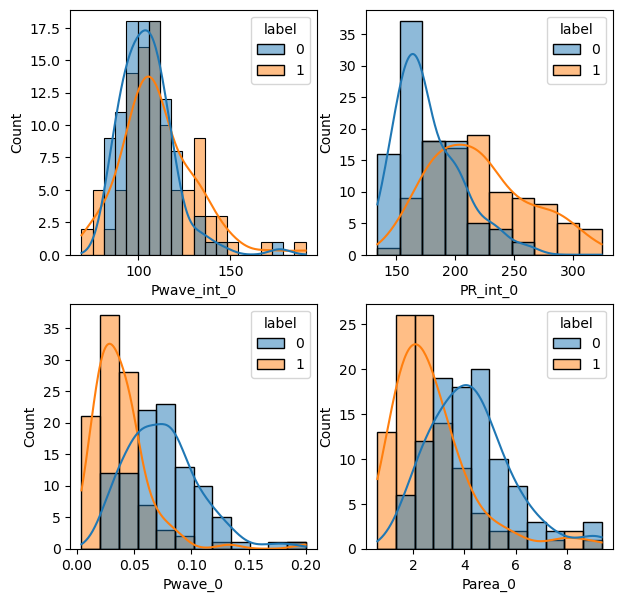

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.histplot(data=all_recording_features, x="Pwave_int_0", kde=True, ax=axs[0, 0], hue='label')
sns.histplot(data=all_recording_features, x="PR_int_0", kde=True, ax=axs[0, 1], hue='label')
sns.histplot(data=all_recording_features, x="Pwave_0", kde=True, ax=axs[1, 0], hue='label')
sns.histplot(data=all_recording_features, x="Parea_0", kde=True, ax=axs[1, 1], hue='label')

plt.show()

In practical applications, you can discover the utilization of HRV and morphological features across a spectrum of ECG analysis tasks. Interestingly, certain tasks demonstrate a level of comparability between feature engineering (FE) methods and state-of-the-art deep learning (DL) techniques, while also showcasing the efficiency advantages of FE in terms of required training data size.

<center><img src="figures/FEvsDL.png" width="1000" /></center>

<center>Zvuloni E., et al.; IEEE TBME; 2023</center>

#### References:

**1.** [PhysioZoo](https://physiozoo.com/)

**2.** [S. Gendelman et al., "PhysioZoo ECG: Digital electrocardiography biomarkers to assess cardiac conduction," 2021 Computing in Cardiology (CinC), Brno, Czech Republic, 2021, pp. 1-4, doi: 10.23919/CinC53138.2021.9662857.
](https://ieeexplore.ieee.org/abstract/document/9662857)

**3.** [pecg docs.](https://pecg.readthedocs.io/en/latest/index.html)

**4.** [PTB-XL database on PhysioNet](https://physionet.org/content/ptb-xl/1.0.3/)

**5.** [Martínez, et al.; “A wavelet-based ECG delineator: evaluation on standard databases” IEEE Transactions on biomedical engineering; 2004](https://ieeexplore.ieee.org/abstract/document/1275572?casa_token=bIWP-_aJIcMAAAAA:4VQCaPXhfpBRPNLsxZzNSR1iuDnwT-InFCAYnkIbL58_ZT-b6rylZexg3HoRp0-fWtlR3g))


**6.** [Behar J., et al.; "ECG signal quality during arrhythmia and its application to false alarm reduction"; IEEE Transactions on biomedical engineering; 2013](https://pubmed.ncbi.nlm.nih.gov/23335659/)

**7.** [Zvuloni E., et al; "On Merging Feature Engineering and Deep Learning for Diagnosis, Risk Prediction and Age Estimation Based on the 12-Lead ECG; IEEE Transactions on biomedical engineering"; 2023](https://ieeexplore.ieee.org/abstract/document/10025679?casa_token=FAsc2ZzghWgAAAAA:L_NzB1-TFeEvg3E8uXS-NNWQeuBMA1Q3NDitbr1EpYABOBCoK367WZGwlcjJG2Tt7_CCEw)

#### *This tutorial was written by [Eran Zvuloni](https://www.linkedin.com/in/eran-zvuloni-315314218/) and [Dr. Jonathan Sobel](https://www.linkedin.com/in/jonathan-sobel-phd-a9a4aa27/)*